In [4]:
!pip install --upgrade pandas
!pip install --upgrade matplotlib
!pip install --upgrade seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 24.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.2.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 51.6 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.

# New Section

Missing values in the dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

Summary statistics for numerical features:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max   

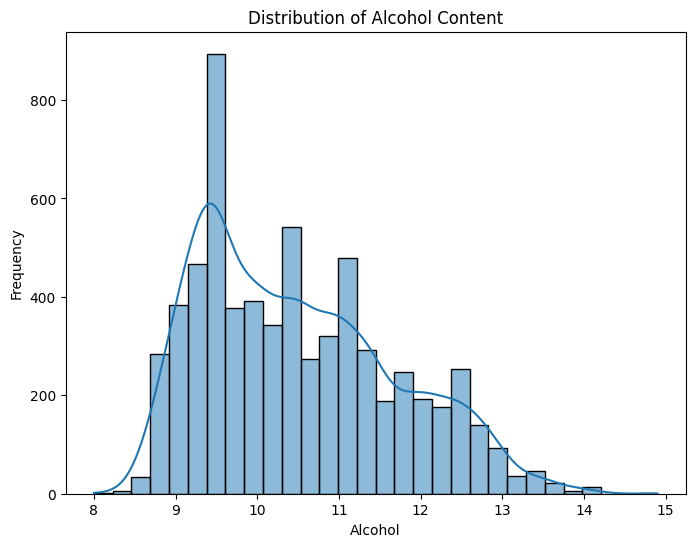


Rows where alcohol content is greater than 12:
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
45             4.6              0.52         0.15             2.1      0.054   
95             4.7              0.60         0.17             2.3      0.058   
131            5.6              0.50         0.09             2.3      0.049   
132            5.6              0.50         0.09             2.3      0.049   
142            5.2              0.34         0.00             1.8      0.050   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
45                   8.0                  65.0   0.9934  3.90       0.56   
95                  17.0                 106.0   0.9932  3.85       0.60   
131                 17.0                  99.0   0.9937  3.63       0.63   
132                 17.0                  99.0   0.9937  3.63       0.63   
142                 27.0                  63.0   0.9916  3.68       0.79   

     alcohol  

In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Loading: Load the dataset into a Pandas DataFrame
# Ensure you've downloaded the dataset from the UCI website and have the CSV files in your working directory
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')

# Adding a 'type' column to distinguish between red and white wine
red_wine['type'] = 'red'
white_wine['type'] = 'white'

# Combine both datasets
wine_df = pd.concat([red_wine, white_wine])

# 2. Data Cleaning: Handle missing values and data type conversions as necessary
# Check for missing values
print("Missing values in the dataset:")
print(wine_df.isnull().sum())

# Since there are no missing values in the dataset, no further cleaning is needed

# 3. Data Exploration:
# Calculate summary statistics (mean, median, mode, count, etc.) for numerical features
summary_stats = wine_df.describe()
print("\nSummary statistics for numerical features:")
print(summary_stats)

# Calculate frequency counts for the categorical feature 'type'
type_counts = wine_df['type'].value_counts()
print("\nFrequency counts for 'type' (red vs white):")
print(type_counts)

# Visualize the distribution of a numerical feature (e.g., 'alcohol') using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(wine_df['alcohol'], bins=30, kde=True)
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()

# 4. Data Filtering:
# Filter the data to include only rows where alcohol content is above 12
high_alcohol_df = wine_df[wine_df['alcohol'] > 12]
print("\nRows where alcohol content is greater than 12:")
print(high_alcohol_df.head())

# Filter the data to exclude rows with missing values (though none exist in this dataset)
wine_df_filtered = wine_df.dropna()

# 5. Data Grouping:
# Group by 'quality' and calculate summary statistics for numeric columns only
grouped_quality = wine_df.groupby('quality').mean(numeric_only=True)
print("\nGrouped by 'quality' (mean values for numeric features):")
print(grouped_quality)

# Group by both 'type' and 'quality' and calculate summary statistics for numeric columns
grouped_multi = wine_df.groupby(['type', 'quality']).mean(numeric_only=True)
print("\nGrouped by 'type' and 'quality' (mean values for numeric features):")
print(grouped_multi)

# 6. Data Merging:
# Assuming you have another dataset to merge (mock dataset)
additional_data = pd.DataFrame({
    'wine_id': range(1, 11),
    'region': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
})

# Adding a 'wine_id' to our original dataframe for merging (dummy column)
wine_df['wine_id'] = range(1, len(wine_df) + 1)

# Merge datasets based on 'wine_id'
merged_df = pd.merge(wine_df, additional_data, on='wine_id', how='inner')
print("\nMerged DataFrame with additional data:")
print(merged_df.head())

# 7. Data Sorting:
# Sort the data by 'alcohol' content in descending order
sorted_wine_df = wine_df.sort_values(by='alcohol', ascending=False)
print("\nTop rows sorted by 'alcohol' content (descending):")
print(sorted_wine_df[['alcohol', 'quality', 'type']].head())
